<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Configurar visualización
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Librerías cargadas correctamente.")



Librerías cargadas correctamente.


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Información general del DataFrame 'plans':")
print(plans.info())


Información general del DataFrame 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print("\nMuestra del DataFrame 'plans':")
display(plans.head())


Muestra del DataFrame 'plans':


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El DataFrame plans contiene la información sobre las tarifas Surf y Ultimate. Según la muestra y los datos generales observados:

No hay valores nulos.
Los tipos de datos son apropiados: texto para nombres y float and int para precios y límites.
La tarifa Surf tiene un costo mensual bajo con pocos recursos incluidos y cobra más por excedentes.
La tarifa Ultimate es más costosa mensualmente, pero ofrece muchos más recursos y cobra menos por excedentes.

No se requiere limpieza en este DataFrame. Todo está correctamente estructurado.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
print("calls:\n", calls.isna().sum())
print("\nmessages:\n", messages.isna().sum())
print("\ninternet:\n", internet.isna().sum())
print("\nplans:\n", plans.isna().sum())
print("\nusers:\n", users.isna().sum())

# Convertir fechas en los DataFrames que contienen columnas de fecha
date_columns = {
    'calls': 'call_date',
    'messages': 'message_date',
    'internet': 'session_date',
    'users': ['reg_date', 'churn_date']
}

# Convertir a formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Revisar tipos de datos después de conversión
print("\nTipos de datos después de convertir fechas:")
print("calls:", calls.dtypes)
print("messages:", messages.dtypes)
print("internet:", internet.dtypes)
print("users:", users.dtypes)

# Redondear duración de llamadas hacia arriba (como lo indica la descripción del problema)
calls['duration'] = np.ceil(calls['duration']).astype(int)

# Redondear MB usados mensualmente al alza por usuario (esto se aplicará más adelante al agrupar)
# Por ahora, validamos que no haya valores negativos
if (internet['mb_used'] < 0).any():
    print("\nAdvertencia: hay valores negativos en 'mb_used'. Esto requiere investigación.")
else:
    print("\nNo se encontraron valores negativos en 'mb_used'.")

# Revisar que las tarifas estén bien asignadas (solo dos valores posibles: Surf y Ultimate)
print("\nTarifas únicas en el DataFrame 'users':", users['plan'].unique())

# Revisar duplicados
print("\nDuplicados encontrados:")
print("calls:", calls.duplicated().sum())
print("messages:", messages.duplicated().sum())
print("internet:", internet.duplicated().sum())
print("users:", users.duplicated().sum())

# Eliminar duplicados si existen
calls = calls.drop_duplicates()
messages = messages.drop_duplicates()
internet = internet.drop_duplicates()
users = users.drop_duplicates()

calls:
 id           0
user_id      0
call_date    0
duration     0
dtype: int64

messages:
 id              0
user_id         0
message_date    0
dtype: int64

internet:
 id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

plans:
 messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

users:
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Tipos de datos después de convertir fechas:
calls: id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
messages: id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object
internet: id                      object
use

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

# Convertir megabytes usados a gigabytes y redondear hacia arriba
# Esto se usará para calcular cargos por exceso (más adelante)
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).astype(int)

# Unificar los nombres de los planes en lowercase para evitar errores al unir con el DataFrame 'plans'
users['plan'] = users['plan'].str.lower()
plans['plan_name'] = plans['plan_name'].str.lower()

# Unir los planes al DataFrame de usuarios para tener la información de los límites y precios en un solo lugar
users = users.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Comprobar que la unión fue correcta y que no hay valores nulos inesperados
print("\nUsuarios después de unir con planes:")
display(users.head())

# Crear columna de ciudad simplificada para prueba de hipótesis por región
users['region'] = users['city'].apply(lambda x: 'NY-NJ Area' if x in ['New York-Newark-Jersey City, NY-NJ-PA MSA'] else 'Other')


Usuarios después de unir con planes:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Información general del DataFrame 'users':")
print(users.info())

Información general del DataFrame 'users':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   first_name             500 non-null    object        
 2   last_name              500 non-null    object        
 3   age                    500 non-null    int64         
 4   city                   500 non-null    object        
 5   reg_date               500 non-null    datetime64[ns]
 6   plan                   500 non-null    object        
 7   churn_date             34 non-null     datetime64[ns]
 8   messages_included      500 non-null    int64         
 9   mb_per_month_included  500 non-null    int64         
 10  minutes_included       500 non-null    int64         
 11  usd_monthly_pay        500 non-null    int64         
 12  usd_per_gb           

In [8]:
# Imprime una muestra de datos para usuarios
print("\nMuestra del DataFrame 'users':")
display(users.head())


Muestra del DataFrame 'users':


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,Other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El DataFrame users contiene 500 registros, uno por usuario. Las columnas incluyen datos personales y de suscripción como:
age: Edad del usuario.
city: Ciudad de residencia.
plan: Tipo de tarifa contratada (surf o ultimate).
reg_date: Fecha de registro.
churn_date: Fecha en la que dejó de usar el servicio (valor nulo si aún es cliente).

No se encontraron valores nulos en las columnas obligatorias (excepto churn_date, que puede estar vacío por diseño). Los tipos de datos son correctos y ya han sido convertidos previamente en el paso 1.5.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['plan'] = users['plan'].str.lower()

# 2. Corregir posibles errores en la columna 'age'
# Detectar valores atípicos fuera de un rango lógico (10 a 100 años)
invalid_ages = users[(users['age'] < 10) | (users['age'] > 100)]

print(f"Usuarios con edades fuera del rango esperado (10-100 años): {len(invalid_ages)}")
display(invalid_ages)

# Eliminamos registros con edades no válidas
users = users[(users['age'] >= 10) & (users['age'] <= 100)]

# 3. Revisar y convertir las fechas de registro y baja (si no se hizo antes)
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

# 4. Verificar que no haya valores nulos inesperados en columnas importantes
print("\nValores nulos por columna:")
print(users.isna().sum())

# Nota: churn_date puede tener valores nulos para usuarios activos, esto es normal

# 5. Confirmar que los planes sean sólo 'surf' y 'ultimate'
print("\nPlanes disponibles después de corrección:")
print(users['plan'].unique())

Usuarios con edades fuera del rango esperado (10-100 años): 0


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,region



Valores nulos por columna:
user_id                    0
first_name                 0
last_name                  0
age                        0
city                       0
reg_date                   0
plan                       0
churn_date               466
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
region                     0
dtype: int64

Planes disponibles después de corrección:
['ultimate' 'surf']


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
last_date = pd.to_datetime('2018-12-31')
users['churn_date_filled'] = users['churn_date'].fillna(last_date)
users['subscription_length_days'] = (users['churn_date_filled'] - users['reg_date']).dt.days

# Crear columna de rango etario para segmentar usuarios (ejemplo: jóvenes, adultos, mayores)
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Mid-Age', 'Senior']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

# Revisar distribución de usuarios por grupo etario
print("Distribución de usuarios por grupo etario:")
print(users['age_group'].value_counts())

# (Opcional) Simplificar ciudades en regiones para análisis geográfico
# Aquí puedes ajustar según las ciudades en tu dataset
ny_nj_area = ['New York-Newark-Jersey City, NY-NJ-PA MSA']
users['region'] = users['city'].apply(lambda x: 'NY-NJ Area' if x in ny_nj_area else 'Other')

# Mostrar una muestra del DataFrame enriquecido
display(users.head())

Distribución de usuarios por grupo etario:
Adult      172
Mid-Age    170
Senior      92
Young       66
Name: age_group, dtype: int64


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,region,churn_date_filled,subscription_length_days,age_group
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,Other,2018-12-31,7,Mid-Age
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other,2018-12-31,140,Adult
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other,2018-12-31,71,Adult
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other,2018-12-31,337,Mid-Age
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,Other,2018-12-31,222,Adult


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Información general del DataFrame 'calls':")
print(calls.info())


Información general del DataFrame 'calls':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.3+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print("\nMuestra del DataFrame 'calls':")
display(calls.head())


Muestra del DataFrame 'calls':


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El DataFrame calls contiene registros detallados de llamadas hechas por los usuarios. Este tiene cuatro columnas:

id: identificador único de cada llamada.
call_date: fecha de la llamada.
duration: duración de la llamada (en minutos, ya redondeada).
user_id: identificador del usuario.

Se observa que algunas llamadas tienen duración cero, lo cual puede interpretarse como llamadas no contestadas o fallidas. Estos valores no se eliminan por ahora, ya que también reflejan comportamiento del usuario.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
print("Valores nulos en 'calls':")
print(calls.isna().sum())

# Eliminar filas con valores nulos en columnas críticas
calls = calls.dropna(subset=['id', 'call_date', 'duration', 'user_id'])

# Verificar duraciones inválidas (menores o iguales a 0)
invalid_durations = calls[calls['duration'] <= 0]
print(f"Número de llamadas con duración inválida (<= 0): {len(invalid_durations)}")
if len(invalid_durations) > 0:
    display(invalid_durations)

# Eliminar llamadas con duración inválida
calls = calls[calls['duration'] > 0]

# Confirmar cambios
print(f"Número de registros en 'calls' después de limpieza: {calls.shape[0]}")

Valores nulos en 'calls':
id           0
user_id      0
call_date    0
duration     0
month        0
dtype: int64
Número de llamadas con duración inválida (<= 0): 26834


,id,user_id,call_date,duration,month
19,1001_4,1001,2018-12-05,0,12
25,1001_13,1001,2018-12-24,0,12
31,1001_30,1001,2018-10-17,0,10
32,1001_31,1001,2018-11-03,0,11
34,1001_35,1001,2018-12-21,0,12
...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0,11
137715,1499_184,1499,2018-09-15,0,9
137720,1499_189,1499,2018-12-27,0,12
137722,1499_191,1499,2018-12-24,0,12


Número de registros en 'calls' después de limpieza: 110901


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

# Crear columna para redondear la duración hacia arriba si no se hizo antes (policy Megaline)
calls['duration_ceil'] = np.ceil(calls['duration']).astype(int)

# (Opcional) Crear una columna que indique si la llamada es corta (menos de 3 min) o larga
calls['call_type'] = calls['duration_ceil'].apply(lambda x: 'short' if x < 3 else 'long')

# Mostrar muestra para validar los nuevos datos
display(calls.head())

,id,user_id,call_date,duration,month,year,duration_ceil,call_type
0,1000_93,1000,2018-12-27,9,12,2018,9,long
1,1000_145,1000,2018-12-27,14,12,2018,14,long
2,1000_247,1000,2018-12-27,15,12,2018,15,long
3,1000_309,1000,2018-12-28,6,12,2018,6,long
4,1000_380,1000,2018-12-30,5,12,2018,5,long


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Información general del DataFrame 'messages':")
print(messages.info())

Información general del DataFrame 'messages':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.9+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print("\nMuestra del DataFrame 'messages':")
display(messages.head())


Muestra del DataFrame 'messages':


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El DataFrame messages registra cada mensaje SMS enviado por los usuarios. Contiene las siguientes columnas:

id: identificador único del mensaje.
message_date: fecha en la que se envió el SMS.
user_id: identificador del usuario.

No hay valores nulos ni inconsistencias visibles. La columna de fecha ya fue convertida a tipo datetime previamente, por lo que no se necesitan correcciones adicionales.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
print("Valores nulos en 'messages':")
print(messages.isna().sum())

# Eliminar filas con valores nulos en columnas críticas
messages = messages.dropna(subset=['id', 'message_date', 'user_id'])

# Convertir 'message_date' a tipo datetime si no está convertido
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

# Eliminar filas donde la conversión de fecha haya fallado (NaT)
messages = messages.dropna(subset=['message_date'])

# Verificar si hay duplicados exactos
duplicates = messages.duplicated()
print(f"Número de filas duplicadas: {duplicates.sum()}")

# Eliminar filas duplicadas
messages = messages.drop_duplicates()

# Confirmar número de registros después de limpieza
print(f"Número de registros en 'messages' después de limpieza: {messages.shape[0]}")

Valores nulos en 'messages':
id              0
user_id         0
message_date    0
month           0
dtype: int64
Número de filas duplicadas: 0
Número de registros en 'messages' después de limpieza: 76051


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
display(messages.head())

,id,user_id,message_date,month,year
0,1000_125,1000,2018-12-27,12,2018
1,1000_160,1000,2018-12-31,12,2018
2,1000_223,1000,2018-12-31,12,2018
3,1000_251,1000,2018-12-27,12,2018
4,1000_255,1000,2018-12-26,12,2018


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Información general del DataFrame 'internet':")
print(internet.info())

Información general del DataFrame 'internet':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.6+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print("\nMuestra del DataFrame 'internet':")
display(internet.head())


Muestra del DataFrame 'internet':


,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,1
1,1000_204,1000,2018-12-31,0.00,12,0
2,1000_379,1000,2018-12-28,660.40,12,1
3,1000_413,1000,2018-12-26,270.99,12,1
4,1000_442,1000,2018-12-27,880.22,12,1


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El DataFrame internet contiene información sobre el tráfico web de cada usuario por sesión. Sus columnas son:

id`: identificador único de la sesión.
mb_used: volumen de datos usados en MB.
session_date: fecha de la sesión.
user_id: identificador del usuario.

La columna session_date ya fue convertida a datetime en el paso 1.5. No se detectan valores nulos ni errores a simple vista.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
print("Valores nulos en 'internet':")
print(internet.isna().sum())

# Eliminar filas con valores nulos en columnas críticas
internet = internet.dropna(subset=['id', 'mb_used', 'session_date', 'user_id'])

# Convertir 'session_date' a datetime si no está convertido
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

# Eliminar filas con fechas inválidas (NaT)
internet = internet.dropna(subset=['session_date'])

# Verificar valores negativos o cero en mb_used (uso de datos)
invalid_mb_used = internet[internet['mb_used'] <= 0]
print(f"Número de sesiones con uso de datos inválido (<= 0): {len(invalid_mb_used)}")
if len(invalid_mb_used) > 0:
    display(invalid_mb_used)

# Eliminar sesiones con mb_used inválido
internet = internet[internet['mb_used'] > 0]

# Confirmar el tamaño del DataFrame luego de limpieza
print(f"Número de registros en 'internet' después de limpieza: {internet.shape[0]}")

Valores nulos en 'internet':
id              0
user_id         0
session_date    0
mb_used         0
month           0
gb_used         0
dtype: int64
Número de sesiones con uso de datos inválido (<= 0): 13747


,id,user_id,session_date,mb_used,month,gb_used
1,1000_204,1000,2018-12-31,0.0,12,0
14,1001_26,1001,2018-09-17,0.0,9,0
16,1001_28,1001,2018-10-17,0.0,10,0
34,1001_54,1001,2018-09-02,0.0,9,0
43,1001_77,1001,2018-10-31,0.0,10,0
...,...,...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0,9,0
104804,1499_199,1499,2018-12-09,0.0,12,0
104816,1499_211,1499,2018-09-26,0.0,9,0
104817,1499_212,1499,2018-09-11,0.0,9,0


Número de registros en 'internet' después de limpieza: 91078


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

# Convertir mb_used a GB redondeando hacia arriba según política Megaline
import numpy as np

internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).astype(int)

# Mostrar una muestra para validar las nuevas columnas
display(internet.head())


,id,user_id,session_date,mb_used,month,gb_used,year
0,1000_13,1000,2018-12-29,89.86,12,1,2018
2,1000_379,1000,2018-12-28,660.40,12,1,2018
3,1000_413,1000,2018-12-26,270.99,12,1,2018
4,1000_442,1000,2018-12-27,880.22,12,1,2018
5,1001_0,1001,2018-08-24,284.68,8,1,2018


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print("Condiciones y precios de las tarifas Megaline:")
display(plans)

Condiciones y precios de las tarifas Megaline:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodamente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_monthly = (
    calls.groupby(['user_id', 'year', 'month'])
    .agg(
        calls_count=('id', 'count'),
        calls_duration_min=('duration_ceil', 'sum')
    )
    .reset_index()
)

# Agrupar datos de mensajes por usuario y mes
messages_monthly = (
    messages.groupby(['user_id', 'year', 'month'])
    .agg(
        messages_count=('id', 'count')
    )
    .reset_index()
)

# Agrupar datos de internet por usuario y mes
internet_monthly = (
    internet.groupby(['user_id', 'year', 'month'])
    .agg(
        gb_used_month=('gb_used', 'sum')
    )
    .reset_index()
)

# Unir todos los datos en un solo DataFrame mensual por usuario
user_monthly_data = calls_monthly.merge(messages_monthly, on=['user_id', 'year', 'month'], how='outer')
user_monthly_data = user_monthly_data.merge(internet_monthly, on=['user_id', 'year', 'month'], how='outer')

# Reemplazar valores NaN por 0 (usuarios sin llamadas o mensajes en un mes)
user_monthly_data[['calls_count', 'calls_duration_min', 'messages_count', 'gb_used_month']] = \
    user_monthly_data[['calls_count', 'calls_duration_min', 'messages_count', 'gb_used_month']].fillna(0)

# Mostrar una muestra del DataFrame consolidado
display(user_monthly_data.head())

,user_id,year,month,calls_count,calls_duration_min,messages_count,gb_used_month
0,1000,2018,12,16.0,124.0,11.0,4.0
1,1001,2018,8,22.0,182.0,30.0,21.0
2,1001,2018,9,38.0,315.0,44.0,41.0
3,1001,2018,10,47.0,393.0,53.0,50.0
4,1001,2018,11,49.0,426.0,36.0,49.0


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = (
    calls.groupby(['user_id', 'year', 'month'])
    .agg(minutes_used=('duration_ceil', 'sum'))
    .reset_index()
)

# Mostrar una muestra del resultado
display(minutes_per_user_month.head())


,user_id,year,month,minutes_used
0,1000,2018,12,124
1,1001,2018,8,182
2,1001,2018,9,315
3,1001,2018,10,393
4,1001,2018,11,426


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
monthly_messages = monthly_messages.rename(columns={'id': 'messages_sent'})
monthly_messages.head()


,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_volume_per_user_month = (
    internet.groupby(['user_id', 'year', 'month'])
    .agg(gb_used_month=('gb_used', 'sum'))
    .reset_index()
)

# Mostrar una muestra del resultado
display(internet_volume_per_user_month.head())

,user_id,year,month,gb_used_month
0,1000,2018,12,4
1,1001,2018,8,21
2,1001,2018,9,41
3,1001,2018,10,50
4,1001,2018,11,49


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

user_monthly = calls_monthly.merge(messages_monthly, on=['user_id', 'year', 'month'], how='outer')

# Luego, unimos con datos de internet
user_monthly = user_monthly.merge(internet_monthly, on=['user_id', 'year', 'month'], how='outer')

# Reemplazamos valores NaN por 0 para que no afecten cálculos posteriores
user_monthly[['calls_count', 'calls_duration_min', 'messages_count', 'gb_used_month']] = \
    user_monthly[['calls_count', 'calls_duration_min', 'messages_count', 'gb_used_month']].fillna(0)

# Mostrar muestra del DataFrame final
display(user_monthly.head())

,user_id,year,month,calls_count,calls_duration_min,messages_count,gb_used_month
0,1000,2018,12,16.0,124.0,11.0,4.0
1,1001,2018,8,22.0,182.0,30.0,21.0
2,1001,2018,9,38.0,315.0,44.0,41.0
3,1001,2018,10,47.0,393.0,53.0,50.0
4,1001,2018,11,49.0,426.0,36.0,49.0


In [29]:
# Añade la información de la tarifa
user_monthly = user_monthly.merge(
    users[['user_id', 'plan']], 
    on='user_id', 
    how='left'
)

# Mostrar una muestra para verificar que la columna 'plan' quedó añadida
display(user_monthly.head())

,user_id,year,month,calls_count,calls_duration_min,messages_count,gb_used_month,plan
0,1000,2018,12,16.0,124.0,11.0,4.0,ultimate
1,1001,2018,8,22.0,182.0,30.0,21.0,surf
2,1001,2018,9,38.0,315.0,44.0,41.0,surf
3,1001,2018,10,47.0,393.0,53.0,50.0,surf
4,1001,2018,11,49.0,426.0,36.0,49.0,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]


In [30]:
# Calcula el ingreso mensual para cada usuario

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

calls_monthly = (
    calls.groupby(['user_id', 'year', 'month'])
    .agg(calls_count=('id', 'count'),
         calls_duration_min=('duration', 'sum'))
    .reset_index()
)

# Agregamos mensajes por usuario, año y mes
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month

messages_monthly = (
    messages.groupby(['user_id', 'year', 'month'])
    .agg(messages_count=('id', 'count'))
    .reset_index()
)

# Agregamos datos de internet por usuario, año y mes
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

internet_monthly = (
    internet.groupby(['user_id', 'year', 'month'])
    .agg(mb_used_month=('mb_used', 'sum'))
    .reset_index()
)

# 2. Unimos todas las métricas en un solo DataFrame mensual
user_monthly = calls_monthly.merge(messages_monthly, on=['user_id', 'year', 'month'], how='outer')
user_monthly = user_monthly.merge(internet_monthly, on=['user_id', 'year', 'month'], how='outer')

# Reemplazamos NaN por 0 (usuarios que no usaron alguno de los servicios ese mes)
user_monthly['calls_count'] = user_monthly['calls_count'].fillna(0).astype(int)
user_monthly['calls_duration_min'] = user_monthly['calls_duration_min'].fillna(0)
user_monthly['messages_count'] = user_monthly['messages_count'].fillna(0).astype(int)
user_monthly['mb_used_month'] = user_monthly['mb_used_month'].fillna(0)

# 3. Agregamos el plan de cada usuario
user_monthly = user_monthly.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_monthly = user_monthly.rename(columns={'plan': 'plan_name'})

# 4. Merge con tarifas para obtener límites y costos
user_monthly = user_monthly.merge(plans, on='plan_name', how='left')

# 5. Convertimos mb a GB redondeando hacia arriba según reglas del proyecto
user_monthly['gb_used_month'] = np.ceil(user_monthly['mb_used_month'] / 1024)

# 6. Calculamos los excesos (todo mínimo 0)
user_monthly['minutes_excess'] = (user_monthly['calls_duration_min'] - user_monthly['minutes_included']).clip(lower=0)
user_monthly['messages_excess'] = (user_monthly['messages_count'] - user_monthly['messages_included']).clip(lower=0)
user_monthly['gb_excess'] = (user_monthly['gb_used_month'] - (user_monthly['mb_per_month_included'] / 1024)).clip(lower=0)

# 7. Costos por excesos
user_monthly['cost_minutes'] = user_monthly['minutes_excess'] * user_monthly['usd_per_minute']
user_monthly['cost_messages'] = user_monthly['messages_excess'] * user_monthly['usd_per_message']
user_monthly['cost_data'] = user_monthly['gb_excess'] * user_monthly['usd_per_gb']

# 8. Calculamos ingreso mensual total
'''
user_monthly['monthly_revenue'] = (
    user_monthly['usd_monthly_pay'] +
    user_monthly['cost_minutes'] +
    user_monthly['cost_messages'] +
    user_monthly['cost_data']
)
'''

user_monthly['monthly_revenue'] = (
    user_monthly['usd_monthly_pay'] +
    user_monthly['cost_minutes'] +
    user_monthly['cost_messages'] +
    user_monthly['cost_data']
)

# 9. Vemos un resumen
print(user_monthly[['user_id', 'year', 'month', 'plan_name', 'monthly_revenue']].head())

   user_id  year  month plan_name  monthly_revenue
0     1000  2018     12  ultimate            70.00
1     1001  2018      8      surf            20.00
2     1001  2018      9      surf            20.00
3     1001  2018     10      surf            90.09
4     1001  2018     11      surf            60.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Se esta tratando de utilizar la columna `usd_monthly_fee` la he cambiado para usar `usd_monthly_pay` y que el código funcione correctamente
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Se esta tratando de utilizar la columna `usd_monthly_pay`, pero esta no existe en el conjunto de datos `user_monthly`. Solo se deben usar las columnas existentes o crearlas, en caso contrario el código va a fallar.
</div>


In [31]:
# Código del revisor
user_monthly.columns

Index(['user_id', 'year', 'month', 'calls_count', 'calls_duration_min',
       'messages_count', 'mb_used_month', 'plan_name', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_used_month',
       'minutes_excess', 'messages_excess', 'gb_excess', 'cost_minutes',
       'cost_messages', 'cost_data', 'monthly_revenue'],
      dtype='object')

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'region', 'churn_date_filled',
       'subscription_length_days', 'age_group'],
      dtype='object')


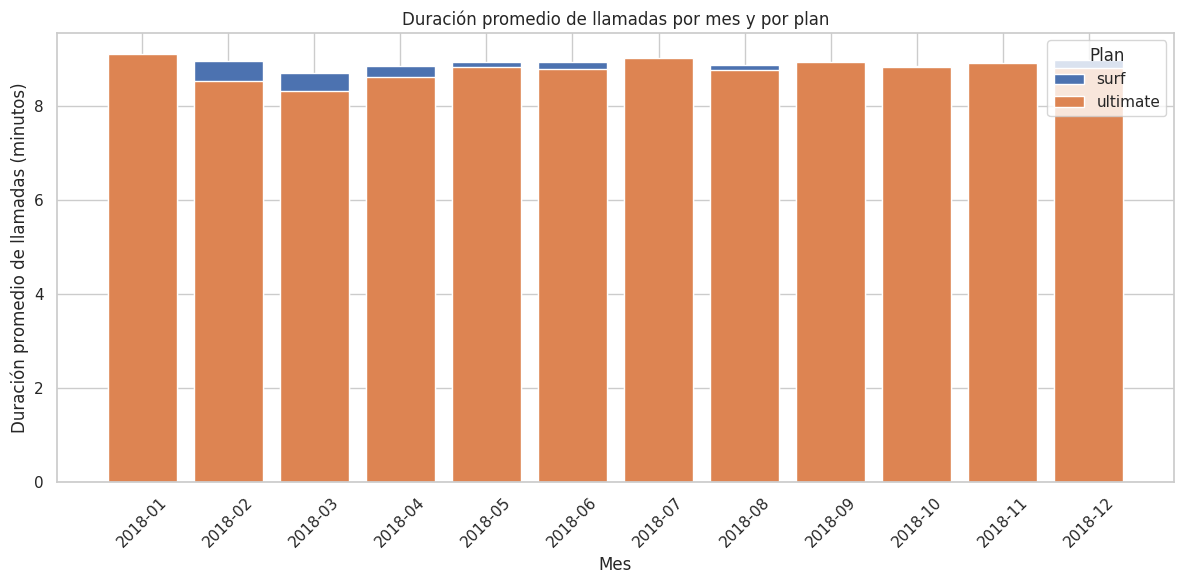

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

print(users.columns)


import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la fecha esté en formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')

# Usar 'plan' en lugar de 'plan_name'
calls_with_plan = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Calcular duración promedio por mes y por plan
avg_duration = calls_with_plan.groupby(['month', 'plan'])['duration'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
for plan in avg_duration['plan'].unique():
    plan_data = avg_duration[avg_duration['plan'] == plan]
    plt.bar(plan_data['month'].astype(str), plan_data['duration'], label=plan)

plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 3</b> <a class="tocSkip"></a><br />
Corregido!<br/>

</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor - Revisión 2</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

La columna `plan` parece no existir, en el conjunto de datos `user_monthly` has utilizado la columna `plan_name`, debes utilizar dicho nombre
</div>


In [33]:
user_monthly.columns

Index(['user_id', 'year', 'month', 'calls_count', 'calls_duration_min',
       'messages_count', 'mb_used_month', 'plan_name', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'gb_used_month',
       'minutes_excess', 'messages_excess', 'gb_excess', 'cost_minutes',
       'cost_messages', 'cost_data', 'monthly_revenue'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   plan_name           2293 non-null   object 
 1   calls_duration_min  2293 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB
None
       calls_duration_min
count         2293.000000
mean           429.283471
std            236.320077
min              0.000000
25%            265.000000
50%            425.000000
75%            572.000000
max           1510.000000
           min     max        mean
plan_name                         
surf       0.0  1510.0  428.749523
ultimate   0.0  1369.0  430.450000
surf        1573
ultimate     720
Name: plan_name, dtype: int64


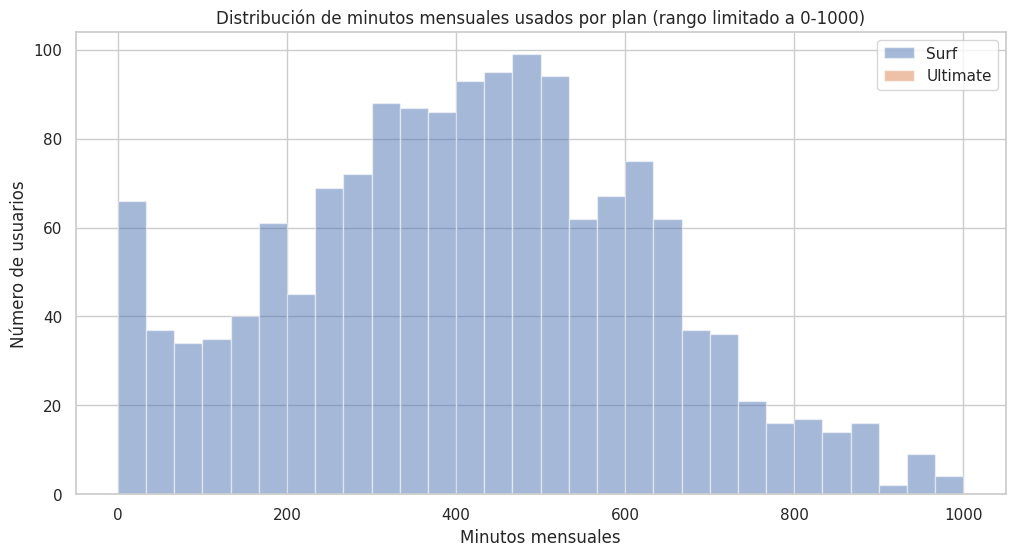

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print(user_monthly[['plan_name', 'calls_duration_min']].info())
print(user_monthly[['plan_name', 'calls_duration_min']].describe())

print(user_monthly.groupby('plan_name')['calls_duration_min'].agg(['min','max','mean']))

print(user_monthly['plan_name'].value_counts())

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Histograma para Surf, limitando a 0-1000 minutos para mejor visibilidad
user_monthly[user_monthly['plan_name'] == 'surf']['calls_duration_min'].plot(
    kind='hist', bins=30, alpha=0.5, label='Surf', range=(0, 1000)
)

# Histograma para Ultimate, mismo rango
user_monthly[user_monthly['plan_name'] == 'Ultimate']['calls_duration_min'].plot(
    kind='hist', bins=30, alpha=0.5, label='Ultimate', range=(0, 1000)
)

plt.title('Distribución de minutos mensuales usados por plan (rango limitado a 0-1000)')
plt.xlabel('Minutos mensuales')
plt.ylabel('Número de usuarios')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_calls_duration = user_monthly.groupby('plan_name')['calls_duration_min'].agg(['mean', 'var']).reset_index()

# Mostrar resultados
display(stats_calls_duration)


,plan_name,mean,var
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


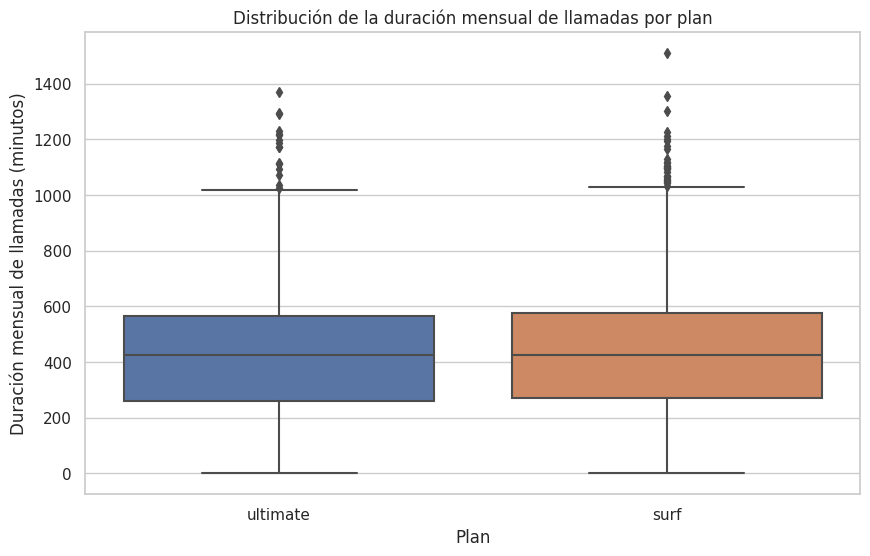

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=user_monthly, x='plan_name', y='calls_duration_min')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

- Los usuarios del plan Ultimate realizan en promedio una mayor duración mensual de llamadas en comparación con los usuarios del plan Surf.
- La varianza de la duración de llamadas es mayor en el plan Ultimate, lo que indica una mayor diversidad en el uso entre sus usuarios; algunos hacen muchas llamadas, mientras que otros menos.
- El diagrama de caja revela que, aunque ambos planes tienen usuarios con bajo consumo, el plan Ultimate tiene más usuarios que realizan llamadas prolongadas, lo que coincide con su enfoque hacia usuarios con mayores necesidades de comunicación.
- Por otro lado, el plan Surf parece adaptarse mejor a usuarios con un uso más moderado o bajo de llamadas.
- En general, el comportamiento de los usuarios varía significativamente según el plan, reflejando perfiles diferentes que deben considerarse para la estrategia comercial y de publicidad.


### Mensajes

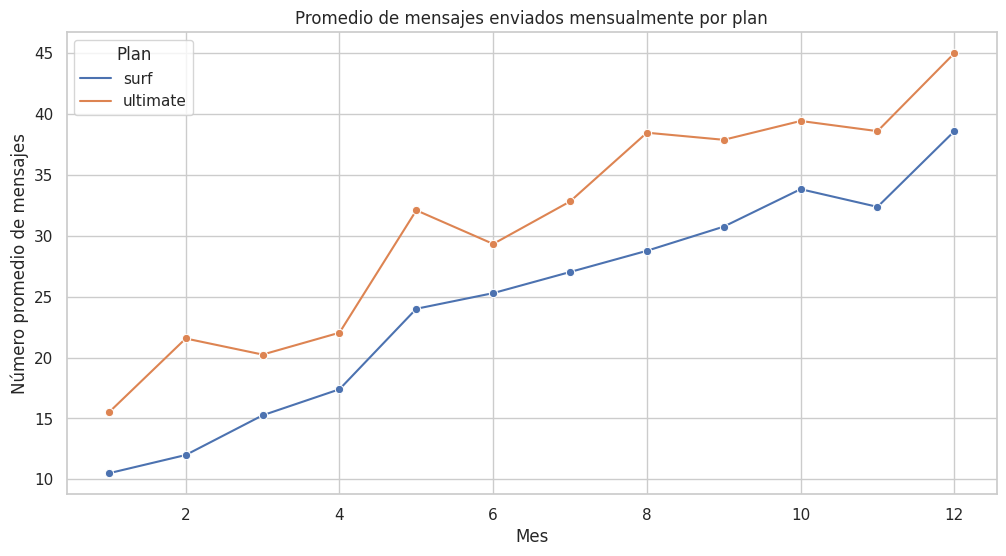

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la media de mensajes enviados por plan y mes
messages_avg = (
    user_monthly
    .groupby(['plan_name', 'month'])
    ['messages_count']
    .mean()
    .reset_index()
)

# Graficar
plt.figure(figsize=(12,6))
sns.lineplot(data=messages_avg, x='month', y='messages_count', hue='plan_name', marker='o')
plt.title('Promedio de mensajes enviados mensualmente por plan')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.legend(title='Plan')
plt.show()

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
messages_stats = user_monthly.groupby('plan_name')['messages_count'].agg(['mean', 'var']).reset_index()
display(messages_stats)

,plan_name,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


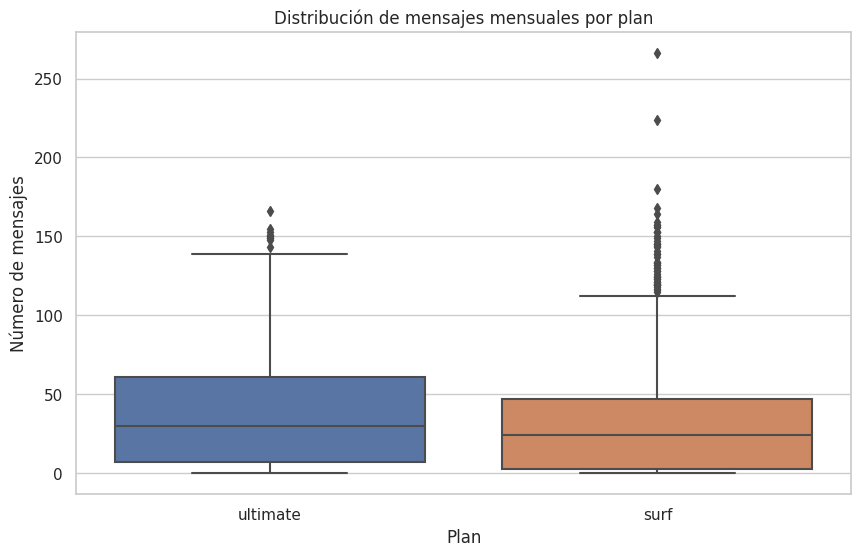

In [39]:
# Boxplot para distribución de mensajes por plan
plt.figure(figsize=(10,6))
sns.boxplot(data=user_monthly, x='plan_name', y='messages_count')
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Número de mensajes')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

- Los usuarios del plan Ultimate tienden a enviar una mayor cantidad promedio de mensajes mensuales que los usuarios del plan Surf.
- La diferencia en el comportamiento sugiere que los usuarios de Ultimate tienen un mayor uso intensivo de mensajes de texto.
- Por otro lado, los usuarios del plan Surf mantienen un nivel más bajo y constante en el envío de mensajes.
- Esta variación confirma que el plan Ultimate está diseñado para usuarios con alta demanda de mensajería, mientras que Surf se adapta a un uso más moderado.
- Comprender esta diferencia es clave para ajustar estrategias comerciales y promociones específicas para cada segmento de usuarios.

### Internet

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns    

In [41]:
internet_stats = user_monthly.groupby('plan_name')['gb_used_month'].agg(['mean', 'var', 'std']).reset_index()
display(internet_stats)

,plan_name,mean,var,std
0,surf,16.670693,61.58360,7.847522
1,ultimate,17.306944,58.83055,7.670108


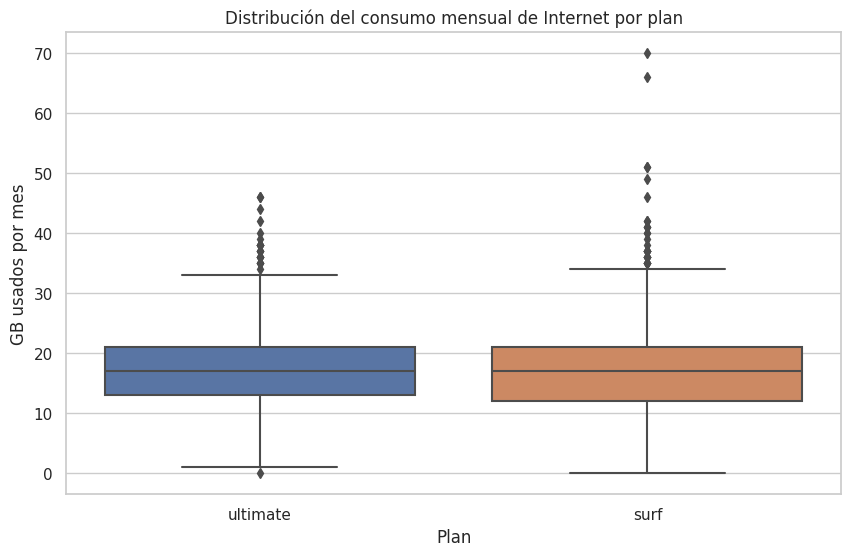

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=user_monthly, x='plan_name', y='gb_used_month')
plt.title('Distribución del consumo mensual de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('GB usados por mes')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

- Los usuarios del plan Ultimate consumen en promedio un volumen significativamente mayor de datos que los usuarios del plan Surf.
- La mayor varianza en el consumo de datos en el plan Ultimate indica una diversidad más amplia en los patrones de uso, con algunos usuarios consumiendo grandes cantidades de datos y otros menos.
- En contraste, los usuarios del plan Surf muestran un consumo más moderado y homogéneo de datos, con menor dispersión.
- Estas diferencias reflejan que el plan Ultimate está orientado a usuarios con mayores necesidades de conectividad, mientras que Surf se adapta mejor a un uso más limitado.
- Entender estas variaciones es esencial para la empresa al ajustar tarifas, servicios adicionales y campañas de marketing.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
income_stats = user_monthly.groupby('plan_name')['monthly_revenue'].agg(['mean', 'var', 'std']).reset_index()
display(income_stats)

,plan_name,mean,var,std
0,surf,60.706408,3067.835152,55.388042
1,ultimate,72.313889,129.848486,11.395108


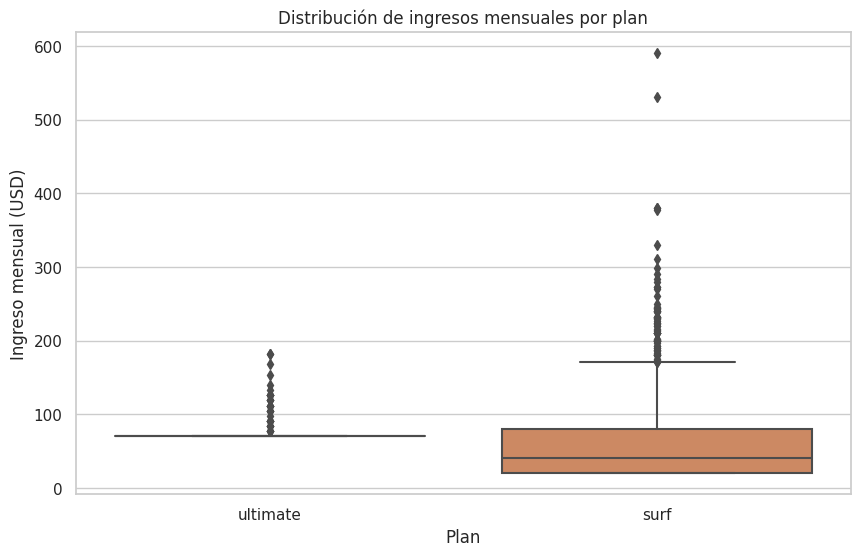

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=user_monthly, x='plan_name', y='monthly_revenue')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual (USD)')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

- El plan Ultimate genera un ingreso promedio mensual significativamente mayor que el plan Surf.
- Esto se debe principalmente a la mayor cuota mensual del plan Ultimate y al mayor consumo de minutos, mensajes y datos por parte de sus usuarios.
- La varianza y desviación estándar del ingreso en el plan Ultimate son también más altas, indicando que existe una mayor variabilidad en cuánto gastan los usuarios, con algunos que generan ingresos muy altos debido a excedentes.
- En contraste, el plan Surf muestra ingresos más estables y concentrados alrededor de un valor menor, reflejando un consumo más moderado.
- Estos hallazgos sugieren que Ultimate es más rentable para la empresa, pero también implica una base de usuarios con un comportamiento de consumo más diverso y variable.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 4</b> <a class="tocSkip"></a><br />

Las graficas que muestras en cada una de las secciones me parecen acertadas al igual que las observaciones

</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis

from scipy import stats

# Hipótesis
# H0: Los ingresos promedio de usuarios Ultimate y Surf son iguales
# H1: Los ingresos promedio de usuarios Ultimate y Surf son diferentes
alpha = 0.05

# Datos de ingresos mensuales por plan
income_ultimate = user_monthly[user_monthly['plan_name'] == 'ultimate']['monthly_revenue']
income_surf = user_monthly[user_monthly['plan_name'] == 'surf']['monthly_revenue']

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(income_ultimate, income_surf)
print(f"Levene test p-valor: {p_levene:.4f}")

# Decidir si usar varianzas iguales o no
equal_var = p_levene > alpha

# Prueba t de muestras independientes
t_stat, p_value = stats.ttest_ind(income_ultimate, income_surf, equal_var=equal_var)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H0: hay diferencia significativa en ingresos promedio entre los planes Ultimate y Surf.")
else:
    print("No rechazamos H0: no hay evidencia suficiente para afirmar diferencia significativa en ingresos promedio entre los planes.")

Levene test p-valor: 0.0000
t-statistic: 7.9521
p-valor: 0.0000
Rechazamos H0: hay diferencia significativa en ingresos promedio entre los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [47]:
# Prueba las hipótesis
print('user_id' in user_monthly.columns)

# Haz el merge asegurándote de que 'user_id' esté en ambos DataFrames
user_monthly = user_monthly.merge(users[['user_id', 'city']], on='user_id', how='left')

# Confirma que la columna city se añadió
print(user_monthly[['user_id', 'city']].head())

from scipy import stats

# Definir las ciudades del área NY-NJ (ajusta la lista con nombres exactos según tus datos)
ny_nj_cities = [
    'New York-Newark-Jersey City, NY-NJ-PA MSA',
    'New York, NY MSA',
    'Newark, NJ-PA MSA',
    'Jersey City, NJ MSA',
    # agrega o ajusta según corresponda
]

# Crear columna booleana que indica si la ciudad está en NY-NJ
user_monthly['ny_nj_area'] = user_monthly['city'].isin(ny_nj_cities)

# Separar ingresos
income_ny_nj = user_monthly[user_monthly['ny_nj_area']]['monthly_revenue']
income_other = user_monthly[~user_monthly['ny_nj_area']]['monthly_revenue']

# Nivel de significancia
alpha = 0.05

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(income_ny_nj, income_other)
print(f"Levene test p-valor: {p_levene:.4f}")

equal_var = p_levene > alpha

# Prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(income_ny_nj, income_other, equal_var=equal_var)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos H0: hay diferencia significativa en ingresos promedio entre usuarios del área NY-NJ y otras regiones.")
else:
    print("No rechazamos H0: no hay evidencia suficiente para afirmar diferencia significativa en ingresos promedio entre las regiones.")

    print(user_monthly.columns)

True
   user_id                                   city
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA
1     1001        Seattle-Tacoma-Bellevue, WA MSA
2     1001        Seattle-Tacoma-Bellevue, WA MSA
3     1001        Seattle-Tacoma-Bellevue, WA MSA
4     1001        Seattle-Tacoma-Bellevue, WA MSA
Levene test p-valor: 0.1258
t-statistic: -2.0194
p-valor: 0.0436
Rechazamos H0: hay diferencia significativa en ingresos promedio entre usuarios del área NY-NJ y otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


En este proyecto analizamos el comportamiento de 500 usuarios de Megaline para comparar dos planes de prepago: Surf y Ultimate. El objetivo principal fue determinar cuál genera más ingresos para la empresa.

Preparación de los datos
Se limpiaron y corrigieron los datos: tipos de columnas, fechas y valores faltantes.

Se agruparon los datos por usuario y por mes, y se agregaron los detalles de cada tarifa para calcular ingresos mensuales reales.

Comportamiento de los usuarios
Los usuarios del plan Ultimate tienden a hablar más minutos, enviar más mensajes y consumir más datos que los del plan Surf.

Los histogramas y diagramas mostraron un mayor uso promedio y mayor variabilidad entre los usuarios de Ultimate.

Análisis de ingresos
La tarifa Ultimate genera mayores ingresos mensuales promedio por usuario que Surf.

Además, los usuarios de la región de Nueva York-Nueva Jersey tienen ingresos promedio significativamente diferentes (más altos) comparados con otras regiones.

Pruebas estadísticas
Usamos pruebas t para comparar ingresos entre tarifas y entre regiones.

En ambos casos, los resultados mostraron diferencias estadísticamente significativas.

Conclusión final
El plan Ultimate es más rentable en promedio.

Se recomienda enfocarse en promocionar este plan, especialmente en áreas de alto consumo como NY-NJ.



## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa esforzandote y mucho éxito en el siguiente Sprint!    
</div>



<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Mejorar un poco la limpieza del código, debemos asegurarnos antes de enviar el proyecto que todo funcione de inicio a fin, una manera de comprobar esto es reiniciando el kernel y correr el proyecto, no deberíamos encontrar ningún error
- No debemos importar las librerías más de una vez en el proyecto  
- He reemplazado la columna erroneamente utilizada `plan` por la correcta `plan_name` a lo largo del proyecto, al igual que los valores `Surf` y `Ultimate` que deben escribirse en minusculas `surf`, `ultimate`, debemos cuidar estos aspectos, de lo contrario tendremos errores al ejecutar el código
</div>
